In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
tables = pd.read_html('Table of food nutrients - Wikipedia.html')
len(tables)

16

In [44]:
dairy=tables[0]

In [45]:
dairy.head()

hideDairy products                                                   \
                    Food Measure   Grams Calories Protein Carb. Fiber Fat   
0      Cows' milk, whole   1 qt.   976.0    660.0    32.0    48   0.0  40   
1                   skim   1 qt.   984.0    360.0    36.0    52   0.0   t   
2   Buttermilk, cultured   1 cup   246.0    127.0     9.0    13   0.0   5   
3  Evaporated, undiluted   1 cup   252.0    345.0    16.0    24   0.0  20   
4         Fortified milk  6 cups  1419.0   1373.0    89.0   119   1.4  42   

            
  Sat. fat  
0       36  
1        t  
2        4  
3       18  
4       23

In [46]:
# Define new columns
new_cols= ['Item','Quantity','InGrams','Calories','Protein','Carbs','Fiber','Fat','SaturatedFats']

In [47]:
# Replace headers with new columns
dairy.columns = new_cols
dairy.head()

,Item,Quantity,InGrams,Calories,Protein,Carbs,Fiber,Fat,SaturatedFats
0,"Cows' milk, whole",1 qt.,976.0,660.0,32.0,48,0.0,40,36
1,skim,1 qt.,984.0,360.0,36.0,52,0.0,t,t
2,"Buttermilk, cultured",1 cup,246.0,127.0,9.0,13,0.0,5,4
3,"Evaporated, undiluted",1 cup,252.0,345.0,16.0,24,0.0,20,18
4,Fortified milk,6 cups,1419.0,1373.0,89.0,119,1.4,42,23


In [48]:
# Identify if the item lsit is duplicated
print("Item is duplicated - {}".format(any(dairy.Item.duplicated())))

Item is duplicated - False


In [49]:
# Check for NaN in the columns
print("The column Item contains NaN - %r " % dairy.Item.isnull().values.any())
print("The column Quantity contains NaN - %s " % dairy.Quantity.isnull().values.any())
print("The column InGrams contains NaN - %s " % dairy.InGrams.isnull().values.any())
print("The column Calories contains NaN - %r " % dairy.Calories.isnull().values.any())
print("The column Protein contains NaN - %s " % dairy.Protein.isnull().values.any())
print("The column Carbs contains NaN - %s " % dairy.Carbs.isnull().values.any())
print("The column Fiber contains NaN - %s " % dairy.Fiber.isnull().values.any())
print("The column Fat contains NaN - %s " % dairy.Fat.isnull().values.any())
print("The column SaturatedFats contains NaN - %s " % dairy.SaturatedFats.isnull().values.any())

The column Item contains NaN - False 
The column Quantity contains NaN - True 
The column InGrams contains NaN - True 
The column Calories contains NaN - True 
The column Protein contains NaN - True 
The column Carbs contains NaN - True 
The column Fiber contains NaN - True 
The column Fat contains NaN - True 
The column SaturatedFats contains NaN - True 


In [50]:
# Identify outliers. In this case records that have "Calories" as none 
size_prev = dairy.shape
dairy2 = dairy[np.isfinite(dairy['Calories'])] 
size_after = dairy2.shape
# Reporting the difference in size
print("The size of previous data was - {prev[0]} rows and the size of the new one is {after[0]} rows".
      format(prev=size_prev, after=size_after))

The size of previous data was - 36 rows and the size of the new one is 29 rows


{'whiskers': [<matplotlib.lines.Line2D at 0x1ac2816aa90>,
 'caps': [<matplotlib.lines.Line2D at 0x1ac28815190>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ac2816a730>],
 'medians': [<matplotlib.lines.Line2D at 0x1ac28815850>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ac28815bb0>],
 'means': []}

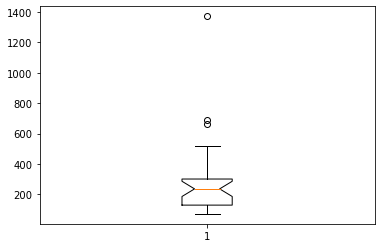

In [51]:
# Plotting Box plots to check outliers
plt.boxplot(dairy2.Calories, notch=True)

In [53]:
# Preserving only the Calories that are less than 1200 Gms to remove outliers
dairy3 = dairy2[(dairy2['Calories'] <= 1200)]
print("After getting rid of outliers the new size of the data is {}".format(*dairy3.shape))

After getting rid of outliers the new size of the data is 28


In [55]:
from Levenshtein import distance
# Conduct fuzzy matching
name_of_group='Item'
dairy3['Item']
for k in dairy3['Item']:
    print("{} {} {}".format(k,name_of_group,distance(name_of_group,k)))

Cows' milk, whole Item 16
skim Item 3
Buttermilk, cultured Item 17
Evaporated, undiluted Item 19
Powdered milk, whole Item 18
skim, instant Item 12
skim, non-instant Item 16
Goats' milk, fresh Item 16
(1/2 cup ice cream) Item 17
Cocoa Item 5
skim. milk Item 9
(cornstarch) Item 11
Custard, baked Item 12
Ice cream, commercial Item 18
Ice milk, commercial Item 17
or half-and-half Item 16
or whipping Item 11
Cheese, cottage, creamed Item 21
uncreamed Item 7
Cheddar, or American Item 18
Cheddar, grated cup Item 17
Cream cheese Item 10
Processed cheese Item 15
Roquefort type Item 13
Swiss Item 5
or raw Item 6
or fried Item 7
Yolks only Item 10
